In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
csvs = glob.glob("*.csv")
dfs = {csv.rpartition('.')[0]: pd.read_csv(csv, index_col=0) for csv in csvs}

In [3]:
storage = pd.concat([dfs['wetstore'], dfs['drystore'], dfs['deepgeo']], axis=1).replace(np.nan, 0.0)
storage.columns = ['Wet Storage', 'Dry Storage', 'Deep Geologic Repository']

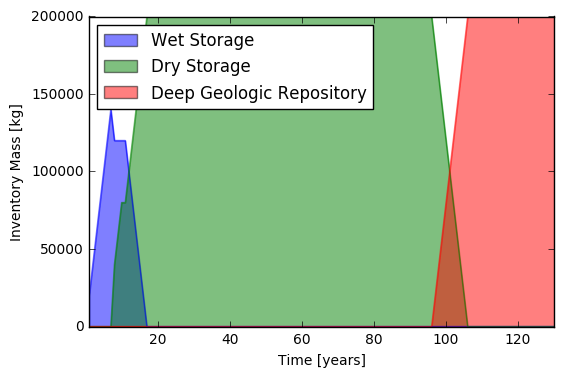

In [4]:
ax = storage.plot(kind='area', stacked=False)
ax.set_xlabel('Time [years]')
ax.set_ylabel('Inventory Mass [kg]')
plt.savefig('inventories.png', bbox_inches='tight')

In [5]:
values = dfs['decayheat'][' Value']
decayheat = pd.concat([values[::3], values[1::3], values[2::3]], axis=1)
decayheat.columns = ['Wet Storage', 'Dry Storage', 'Deep Geologic Repository']

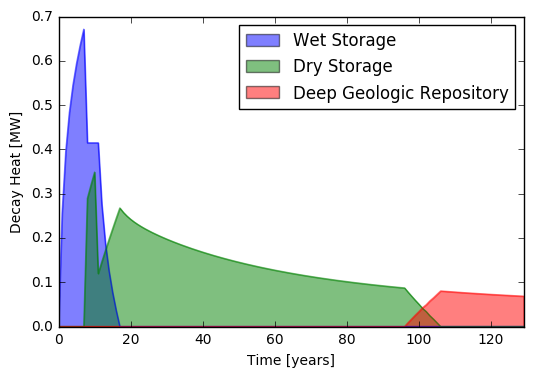

In [6]:
ax = decayheat.plot(kind='area', stacked=False)
ax.set_xlabel('Time [years]')
ax.set_ylabel('Decay Heat [MW]')
plt.savefig('decayheat.png', bbox_inches='tight')

In [7]:
specificdecayheat = (decayheat / storage).replace(np.nan, 0.0).replace(np.inf, 0.0)

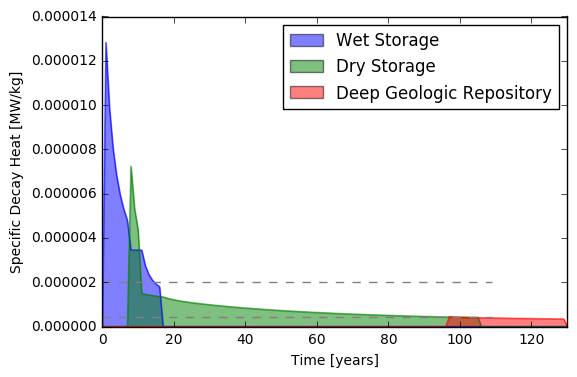

In [8]:
ax = specificdecayheat.plot(kind='area', stacked=False)
plt.plot([0, 109], [2.0e-6, 2.0e-6], c='gray', ls='--')
plt.plot([0, 109], [4.2e-7, 4.2e-7], c='gray', ls='--')
ax.set_xlabel('Time [years]')
ax.set_ylabel('Specific Decay Heat [MW/kg]')
plt.savefig('specificdecayheat.png', bbox_inches='tight')